In [1]:
from __future__ import print_function

# Introduction 
These tutorials aim to explore the world of metrology using Python an open-source easy-to-use programing language.
Many books deals with metrology teoretically without providing real examples. In this document we will cover metrology from the begining: building our own surfaces and analyzing them, simulating instruments with different resolutions.
It is more covenient to start from the simplest thing profiles of surfaces and go to real surfaces. So we will define first the profile parameters and then the aereal parameters. At the end of this book you will be able to compute surface metrolgy over any surface.

# What is it a surface?
The surface definition is often controversial: IUPAC uses three terms: **surface** is a generic term that refers to the outer portion of a depth not defined, while with the term **physical surface**  is meant, for a
sample immersed in a vacuum, the last atomic layer of the sample you would find between the bulk and
vacuum. Less precise definition of the **experimental surface** that we will discuss more in detail hereinafter.

## Surface of an atom
The

# How surfaces are formed?
## Surfaces created by Physicochemical Processes
The surfaces can be formed due to processes with very different origins. The first surfaces formed in the earth where due to phase-transitions, from vapour a liquid surface can be formed and then lowering the temperature below the freezing point a solid surface. Practical examples of these surfaces are ice, metals. In this process **crystalization** is involved if the material cool down with a slow controlled trend otherwise an amorphous phase or the copresence of crystals with an amorphous phase can occur. 
Some materials harden without crystilizing at all in this case instead of phase-change occurs a **glass transition** that occurs at a glass transition temperature and so the process is called  **vitrification**.

More complex surfaces can be built when chemical reactions are involved. In many cases are involved **polimeriazation reactions** mixed with others processes. The advencement in the field of **nanotechnology** allowed the construction of very complex surfaces where different process are involved.


Many paramters can somehow affect the surface creation. The enviroment, 
## Surface in mechanical engeenering
Surface metrology was developed in the mechanical engeenering field. In this field surfaces are formed by milling pieces of metal or in some case casting them. The tools  used for creating the surface usually leave its traces on the pieces. The surface can be hance finished. In fact, after the formation of the surface, many different processes may be applied to change its properties. All these process are are part of the **surface finishing**. 


# The approach of these tutorials
This book deal with the surface from a computational point of view, as a general approach is always better to start reasoning at lower dimension and, when the concept are gasped, add a new dimension. We hence start from surface profiles and then we will pass to consdier areas and eventually volumes and n-dimensional surface. We may deal for both with following goals:

- Rappresent the data:

    - Find data structures for storing the surface.
    - Find a way to visualize the surface.


- Elaborate the data:

    - Find a way to parametrize the surface (describing the surface using statistical parameters).
    - Find a relation between these parameters and any other phenomena.
    
In a non-computerized approach probably we would have previously faced the problem of visualize the surface rather than finding a data structure for storing it. However using a programming language for plotting we need to define previously a data structure.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (18,3)

def pprintarr(arr,name):
    np.set_printoptions(threshold=3,precision=3)
    print(name,'=',arr,', dimenson:',len(arr.shape),', shape:',arr.shape)
    np.set_printoptions(edgeitems=3,formatter=None)

# How to generate and handle profiles.
The profile is the two dimensional rappresentation of the surface. Most of these profile can be generated by means of mathematical functions others must be generated by means of procedures (algorithms). We will see some examples and how these surfaces can be used. As the first step we can generate a pseudo-random dataset of heights with a gaussian distribution.

In [4]:
mean, sigma = 2, 0.5 # mean and standard deviation
points = 500
heights = np.random.normal(mean, sigma, points)
print(type(heights))
pprintarr(heights,'heights')

<class 'numpy.ndarray'>
heights = [1.303 2.146 2.009 ... 1.63  2.595 2.281] , dimenson: 1 , shape: (500,)


The numpy array is already a good data structure for handling a profile data: in this case it's a 1d matrix with size 500 and most of the time is the best approach for computing. However, we will define our own profile data structure for handling all the different cases and metadata that we may encounter.

In [5]:
class Profile:
    '''
    This is a data-structure rappresenting a profile.
    '''
    def __init__(self,heights):
        self.heights = heights


We will add new parameters to this class during the tutorials for getting a more precise data structure.

# Plotting the profile
We will use matplotlib for plotting the profile. A simple line plot is sufficient for getting a first impression of the data.

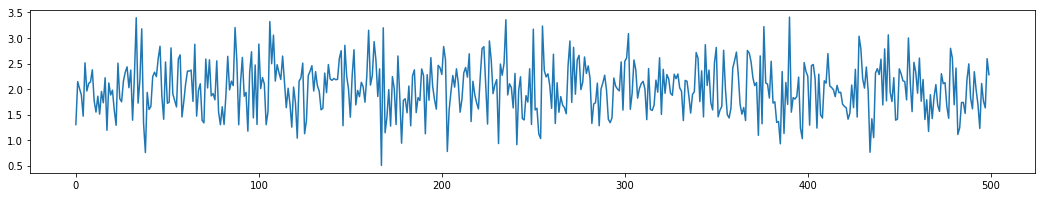

In [6]:
plt.plot(heights)

It's obvious that a lot of information is missing from the plot: What's the unit of measurements of the two axes? For descirbing the profile we need at least the space between the measurements. So we will add three new attirbute to our class:
- the coordinates of the heights 
- the spacing between the measurments
- the the unit of measurment

We also add a built-in method for plotting the profile, called plot.

In [23]:
class Profile:
    '''
    This is a data-structure rappresenting a profile.
    '''
    def __init__(self,heights, coordinates = None ,unit='mm',spacing = None):
        self.heights = heights
        self.coordinates = coordinates
        self.unit = unit
        self.spacing = spacing
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if self.coordinates is None:
            self.coordinates = range(len(self.heights))
        ax.plot(self.coordinates,self.heights,color='k')
        ax.set_xlabel("Coordinates (%s)" %(self.unit))
        ax.set_ylabel("Heights (%s)" %(self.unit))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.fill_between(self.coordinates, -1, self.heights, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)

We can now test the data structure.

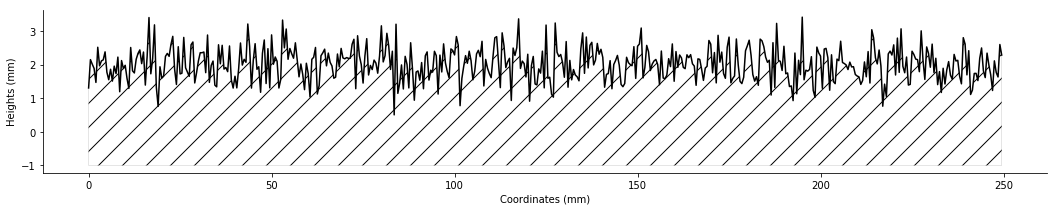

In [24]:
g = Profile(heights = heights,coordinates = np.arange(len(heights))/2.)
g.plot()

We start generating a simple sinusoidal profile.

In [25]:
# we define a linear range between 0 and 1 with 400 steps
x = np.linspace(0,1,400)
Amplitude = 0.2
Frequency = 1
Phase = 0
# We compute the sinusoidal function
y = Amplitude*np.sin(x*2*np.pi*Frequency+Phase)

This is our first profile of type $(X_{i},Y_{i})$ . We know do some basic plotting of it.

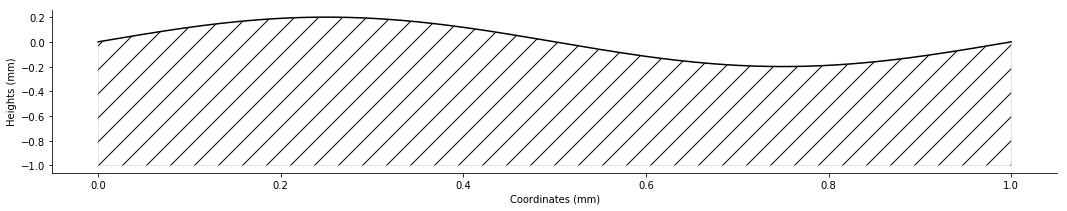

In [26]:
g = Profile(heights = y,coordinates = x)
g.plot()

# Sawtooth or triangle waveform

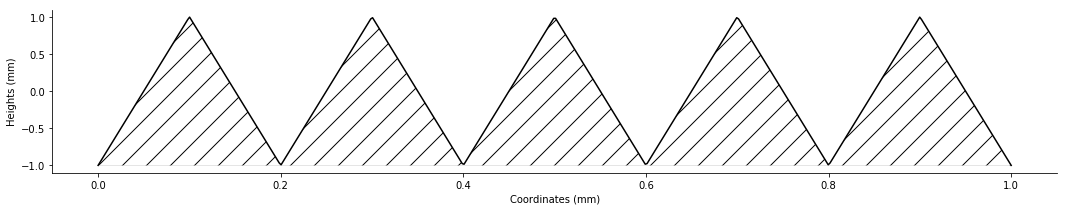

In [27]:
from scipy import signal
t = np.linspace(0, 1, 500)
Y_sawt = signal.sawtooth(2 * np.pi * 5 * t, width = 0.5)
g = Profile(heights = Y_sawt,coordinates = t).plot()

## Cycloid 

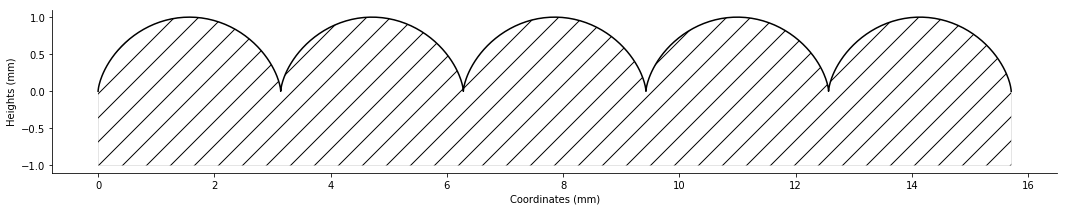

In [28]:
Amplitude = 1
t = np.linspace(-10,10,64)
alpha =  np.linspace(0, 10 * np.pi, 600)
x_cyc = Amplitude/2.*(alpha - np.sin(alpha))
y_cyc = Amplitude/2.*(1 - np.cos(alpha))
g = Profile(heights = y_cyc,coordinates = x_cyc).plot()

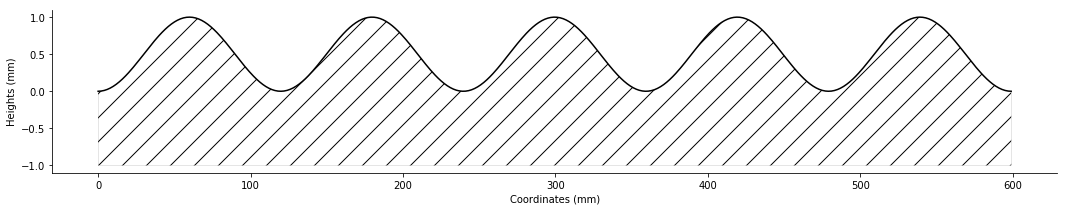

In [29]:
# Try to use only y!
g = Profile(heights = y_cyc).plot()

In [32]:
spacing = np.diff(x_cyc)
print(spacing[:10])

[1.202e-05 8.410e-05 2.281e-04 ... 2.006e-03 2.566e-03 3.191e-03]


The space is not homogeneus! The distance between the point varys. Should quite useful to have a function to spot it.

In [33]:
def homogeneus_spacing(array1d):
    return len(set(np.diff(array1d))) #using set we keep only unique elements so if we have only 1 unique element 
homogeneus_spacing(x) == True

False

## Inverted cycloid

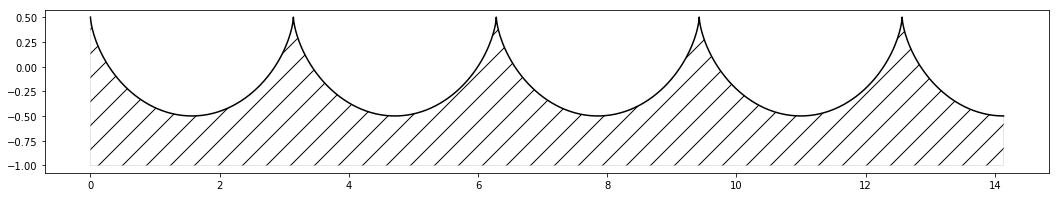

In [8]:
r = 0.5
t = np.linspace(-10,10,100)
alpha =  np.linspace(0, 9 * np.pi, 360)
x = r*(alpha - np.sin(alpha))
y = r*(np.cos(alpha))
plt.plot(x,y,'k-')
plt.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
plt.show()

# A random profile with a Gaussian distribution of heights
Eventually we can produce a random profile with a gaussiand distribution of heights. 

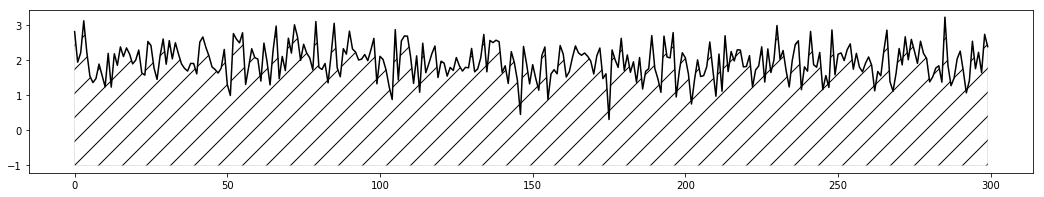

In [9]:
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300
x = range(points)
y = np.random.normal(mean, sigma, points)
plt.plot(x,y,'k-')
plt.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
plt.show()

# Mixing profiles 
Now it's quite easy to generate different profiles.



We can now start to describe the profiles we have created. 
Let's start form the maximum and minium values, much of this work is traslating the descriptive statistics to the metrology field. We start analyzing the max value enconter hence the highest *P*eak  corresponding to the parameters $R_{p}$ end the lowes *v*alley ($R_{v}$):


<function matplotlib.pyplot.show>

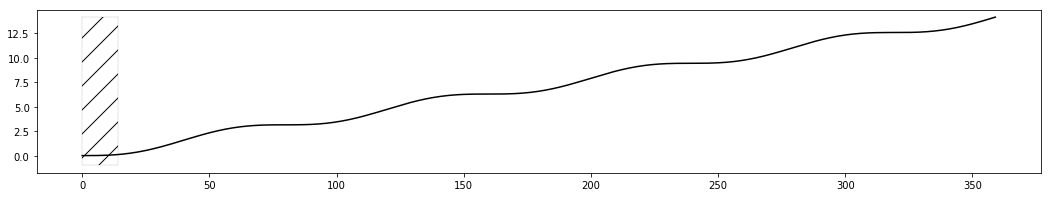

In [34]:
r = 0.5
t = np.linspace(-10,10,100)
alpha =  np.linspace(0, 9 * np.pi, 360)
x = r*(alpha - np.sin(alpha))
y = r*(np.cos(alpha))


reduced = [s for s,_ in sorted(zip(y,x))]

plt.plot(reduced,'k-')
plt.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
plt.show

In [2]:
def spaced_sphere(radius,spheresnumber,spacing=None,completness_percent=0.7,res=100):
    compl = 0.5*completness_percent
    if spacing is None:
        spacing = radius*3
    if spacing < radius*2:
        raise ValueError("Spacing smaller than two radii")
    # theta goes from 0 to 2pi
    # theta = np.linspace(1.5*np.pi,0, 100) - 0.25*np.pi
    # we define the completness of the circle 
    # 1 pi to 0 is half circle the minimum
    # 1.5pi to -0.5 pi is complete, the maximum
    theta = np.linspace((1+compl)*np.pi,-compl*np.pi, res)
    # we calculate the perimeter of the section of circle
    perimeter = (2*np.pi*radius)*(0.5+0.5*completness_percent)
    # distance between point
    # we use this to try to keep constant the distnace in the sphere
    # and in the platou zone
    lgh = perimeter/res
    print(lgh)
    # compute x1 and x2
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    xtot = np.array([])
    ytot = np.array([])
    for i in range(spheresnumber):
        #add the profile
        newx = x+spacing*i
        xtot = np.append(xtot, newx)
        ytot = np.append(ytot,y)
        # spacing values
        #xtot = np.append(xtot,np.linspace(xtot[-1],xtot[-1]+spacing-2*radius+2*radius*compl,res))
        inter_spacing = spacing-2*radius*(1-compl)
        spacing_values = np.arange(xtot[-1]+lgh,xtot[-1] + inter_spacing,lgh)
        xtot = np.append(xtot,spacing_values)
        ytot = np.append(ytot,np.full(len(spacing_values),ytot[-1]))
    spacing_values_b = np.arange(xtot[0]-inter_spacing,xtot[0],lgh)
    xtot = np.insert(xtot, 0,spacing_values_b)
    ytot = np.insert(ytot, 0, np.full(len(spacing_values_b),y[0]))
    return xtot,ytot
        


2.403318379996192


(-10.424776333003905, 11.584635745813788)

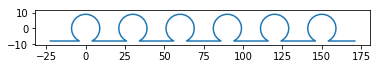

In [10]:
xtot,ytot = spaced_sphere(9,6,spacing=30,completness_percent=0.7,res=20)
plt.plot(xtot,ytot,)#'x')
plt.axis('scaled')
ymin = np.min(ytot)
ymax = np.max(ytot)
plt.ylim(ymin*1.3,ymax*1.3)

This object is not a function because for some x coordinates we have more than 1 y., how can we transofrm this object to a function $p(x) = z$? For a given point of view, we could solve this problem finding what part of the object is not visible for a given point of view, and delete it. This is usually what is called [Hidden-surface determination](https://en.wikipedia.org/wiki/Hidden-surface_determination). We may think to implement an algorithm to choose the value with the highest y for each x. We have howver to consider that this is a discrete representation of the surface. So we migth have value where there is no point associated. For solving this issue we first perform a linear interpolation between each poin and then we will cast a series of rays to determine their intersection with the surface, and choose the intersection with the highest y. We will have a discrete reappresentation this general process in computer graphic is called [rasterization](https://en.wikipedia.org/wiki/Rasterisation).

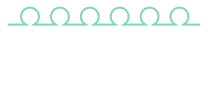

In [11]:
from shapely.geometry.polygon import LineString
from shapely.geometry import MultiLineString,MultiPoint

circlep = LineString(zip(xtot,ytot))
circlep

Now we sample the object using a series of rays (lines) that cover the whole dimension:

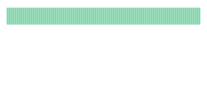

In [12]:
xmin,xmax = np.min(xtot),np.max(xtot)
sampling_step = 2
xsampl = np.arange(xmin,xmax,sampling_step)
lines = [LineString([(x,ymin),(x,ymax)]) for x in xsampl]
MultiLineString(lines)

We find the intersection using the line.intersection() method:

In [13]:
intersections = [line.intersection(circlep) for line in lines]
newprofile = []
discarded_points = []
for i in intersections:
    #print(i)
    if type(i) is MultiPoint:
        ymaxn = i[0].y
        for pt in i:
            if pt.y > ymaxn:
                discarded_points.append([pt.x,ymaxn])
                ymaxn = pt.y
        newprofile.append([pt.x,ymaxn])     
    else:
        newprofile.append([i.x,i.y])
        


(-10.424776333003905, 13.366887399015908)

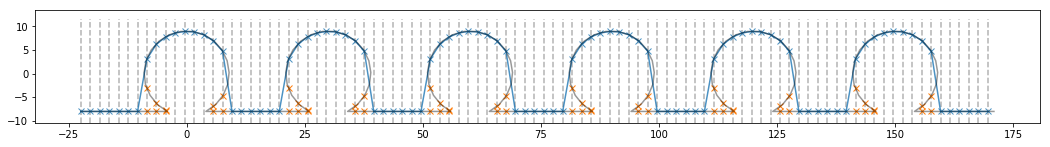

In [29]:
plt.plot(np.array(newprofile)[:,0],np.array(newprofile)[:,1],'-x',alpha=0.8)
plt.plot(np.array(discarded_points)[:,0],np.array(discarded_points)[:,1],'x')
plt.plot(xtot,ytot,alpha=0.4,color='k')
plt.axis('scaled')
for i in xsampl:
    plt.vlines(x=i,ymin=ymin*1.3,ymax=ymax*1.3,linestyles='--',alpha=0.3)
ymin = np.min(ytot)
ymax = np.max(ytot)
plt.ylim(ymin*1.3,ymax*1.5)

(-31.98591449765592, 179.2140855023441, -8.865574566880607, 9.757774115195902)

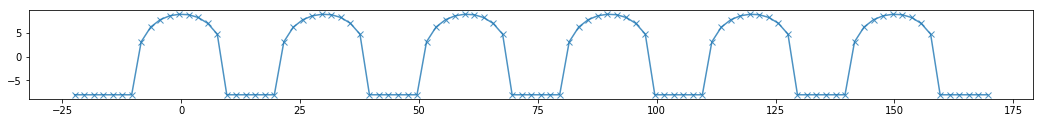

In [35]:
plt.plot(np.array(newprofile)[:,0],np.array(newprofile)[:,1],'-x',alpha=0.8)
plt.axis('scaled')

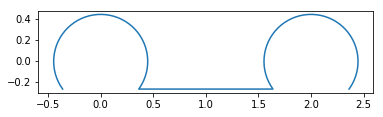

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# theta goes from 0 to 2pi
#theta = np.linspace(1.5*np.pi,0, 100) - 0.25*np.pi
# we define the completness of the circle 
# 1 pi to 0 is half circle the minimum
# 1.5pi to -0.5 pi is complete, the maximum
compl = 0.5/100*completness_percent
theta = np.linspace((1+compl)*np.pi,-compl*np.pi, 100) #- 0.1*np.pi

# the radius of the circle
r = np.sqrt(0.2)

# compute x1 and x2
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)


# create the figure
fig, ax = plt.subplots(1)
ax.plot(np.append(x1,(x1+2)),np.append(x2,x2),)
ax.set_aspect(1)
plt.show()

## What lenght of the profile  evaluate?
The results of the analysis vary depending on the lenght of the profile we use to calculate them. In statistical terms this would be similar of the problem of finding a sample from a population, but in our case we have to bare in mind that we are dealing with **ordered-statistic**. The order of the measurements could metters when performing some calculations (e.g. finding peaks) or when a local filter is applied to the evaluation lenght.
To adress this problem was initially define the **sampling lenght** which was empirically determined analyzing hundreds samples by Rank Taylor Hobson. This is defined as " the lenght of assesment over which the surface roughness can be considered rappresentative" which was found to be 0.8 mm. Five **sampling lenght** are called **evaluation lenght** 


# Finding parameters

In [10]:
Rp = np.max(y)
Rv = np.min(y)
np.argmax(y)

285

In [11]:
Rp,Rv

(3.2218328112688335, 0.30677288230508992)

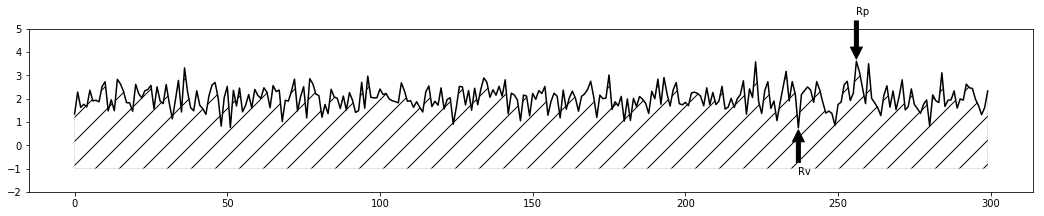

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

mean, sigma = 2, 0.5 # mean and standard deviation
points = 300

x = range(points)
y = np.random.normal(mean, sigma, points)
ax.plot(x,y,'k-')
ax.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)

#Plotting

Rp,Rp_index = np.max(y),np.argmax(y)
Rv,Rv_index = np.min(y),np.argmin(y)

ax.annotate('Rp', xy=(Rp_index, Rp), xytext=(Rp_index, Rp + 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('Rv', xy=(Rv_index, Rv), xytext=(Rv_index, Rv - 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,5)
plt.show()

Thi characterization is however not so robust because it may occur that some anomalous peak or anomalous vallyes change these parameters substantially.
    To reach are more accurate estimation the difference between the sum of the first five highest peaks and the last five lowest valleys is averaged and this parameter is called $R_{z}$: $$ R_{z}  = \frac{\sum_{n=1}^{5}P_{n} - \sum_{n=1}^{5} V_{n}}{5}$$ 

In [13]:
Rz = (sum(sorted(y)[:5]) - sum(sorted(y)[-5:]))/5. # we sort the values and we sum the firt five and last five

#This actually is not right because they may be not peaks

Rz is basically a range that gives us an idea of the dispersion of the heights, to visualizing it is better to calculate onther important parameter Ra.




The most used reference value is the average of the profile $Ra$ from the average is then easy to compute the Standard Deviation to which is assigned to the parameter $Rq$ and is often called Roughness or RMS (eventhought the first term is quite generic and shouldn't be used). We will add this information following the plot proposed by  Reason R E, Hopkins M R and Garrod R I. 1944. Report on the Measurement of Surface Finish by Stylus Methods (Rank Organization, Leicester, UK).





In [38]:
%qtconsole

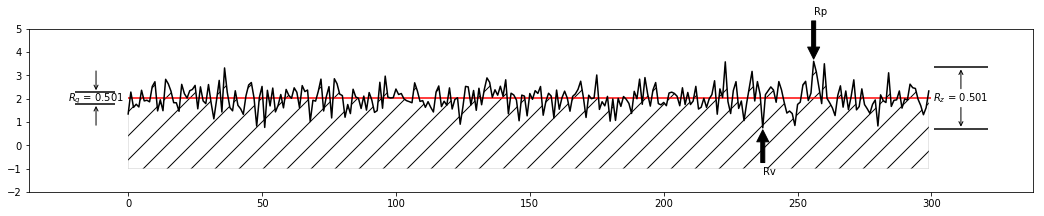

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

mean, sigma = 2, 0.5 # mean and standard deviation
points = 300

ax.plot(x,y,'k-')
ax.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)

#Plotting

Rp,Rp_index = np.max(y),np.argmax(y)
Rv,Rv_index = np.min(y),np.argmin(y)

ax.annotate('Rp', xy=(Rp_index, Rp), xytext=(Rp_index, Rp + 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('Rv', xy=(Rv_index, Rv), xytext=(Rv_index, Rv - 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )



Ra = np.mean(y)
Rq = np.std(y)
ax.hlines(y=Ra,xmin=0,xmax=points,color = 'r')

#Rq indicator
Rq_u = Ra+Rq/2.
Rq_l = Ra-Rq/2.
ax.annotate("", xy=(-12, Rq_u), xytext=(-12, Rq_u + 1),arrowprops=dict(arrowstyle="->"))
ax.hlines(y=Rq_u,xmin=-20,xmax=-5,color = 'k')
ax.text(-12, Ra, '$R_{q}$ = %s' %(round(Rq,3)), horizontalalignment='center', verticalalignment='center')
ax.hlines(y=Rq_l,xmin=-20,xmax=-5,color = 'k')
ax.annotate("", xy=(-12, Rq_l), xytext=(-12, Rq_l - 1),arrowprops=dict(arrowstyle="->"))

#Rz indicator
Rz_u = Ra+Rz/2.
Rz_l = Ra-Rz/2.
ax.annotate("", xy=(max(x) +12, Rz_u), xytext=(max(x) +12, Rz_u + 1),arrowprops=dict(arrowstyle="->"))
ax.hlines(y=Rz_u,xmin=max(x) +2,xmax=max(x) +22,color = 'k')

ax.hlines(y=Rz_l,xmin=max(x) +2,xmax=max(x) +22,color = 'k')
ax.annotate("", xy=(max(x) + 12, Rz_l), xytext=(max(x) + 12, Rz_l - 1),arrowprops=dict(arrowstyle="->"))


ax.set_ylim(-2,5)
plt.show()

In [ ]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
# BLUE
ax.set_xticklabels([])
# RED
ax.set_xticks([])
# RED AND BLUE TOGETHER


# Y AXIS -BORDER

# YELLOW
ax.set_yticklabels([])
# GREEN
ax.set_yticks([])
# YELLOW AND GREEN TOGHETHER
ax.axes.get_yaxis().set_visible(False)

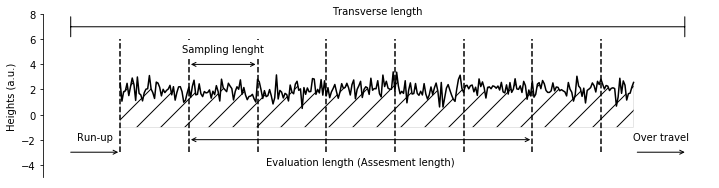

In [85]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300

x = range(points)
y = np.random.normal(mean, sigma, points)
ax.plot(x,y,'k-')
ax.fill_between(x, -1, y, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylim(-5,8)
ax.set_xlim(-45,345)
ax.set_ylabel('Heights (a.u.)')
ax.vlines(range(0,301,40),-3,+6,linestyle='--')
ax.annotate("", xy=(40, 4), xytext=(80, 4),arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(40, -2), xytext=(240, -2),arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(-30,7), xytext=(330, 7),arrowprops=dict(arrowstyle="|-|"))
ax.annotate("", xy=(-30,-3), xytext=(0, -3),arrowprops=dict(arrowstyle="<-"))
ax.annotate("", xy=(300,-3), xytext=(330, -3),arrowprops=dict(arrowstyle="<-"))
ax.text(s='Sampling lenght',x=60,y=5,ha='center',bbox=dict(facecolor='white', edgecolor='white',))
ax.text(s='Transverse length',x=150,y=8,ha='center')
ax.text(s='Evaluation length (Assesment length)',x=140,y=-4,ha='center')
ax.text(s='Run-up',x=-15,y=-2,ha='center')
ax.text(s='Over travel',x=315,y=-2,ha='center')
fig.savefig('EvaluationL.svg')